## Setting up

### Activating base modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import yfinance as yf

### Plotting and display parameters

In [2]:
np.set_printoptions(precision = 3)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

### NLP libraries

In [3]:
from textblob import TextBlob
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import en_core_web_sm
nlp = en_core_web_sm.load()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/samuellim/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
2022-12-15 11:09:57.100332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Libraries for classification ML for modeling sentiments

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data import and transformation

## ETF data

In [5]:
tickers = ["SPY",
           "BND",
           "TLT",
           "SHY",
           "BIL",
           "TIP",
           "GLD",
           "VNQ",
           "DBC"]

start = "1994-01-01"
end = "2022-11-30"

In [6]:
DF_stock_return = pd.DataFrame

for ticker in tickers:
    ticker_YF = yf.Ticker(ticker)

    if DF_stock_return.empty:
        DF_stock_return = ticker_YF.history(start = start,
                                            end = end)
        DF_stock_return["ticker"] = ticker

    else:
        temporary_data = ticker_YF.history(start = start,
                                           end = end)
        temporary_data["ticker"] = ticker
        DF_stock_return = DF_stock_return.append(temporary_data)

DF_stock_return

/var/folders/j7/td711hwx0r17201kknqns3sr0000gn/T/ipykernel_72778/3952600824.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_stock_return = DF_stock_return.append(temporary_data)
/var/folders/j7/td711hwx0r17201kknqns3sr0000gn/T/ipykernel_72778/3952600824.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_stock_return = DF_stock_return.append(temporary_data)
/var/folders/j7/td711hwx0r17201kknqns3sr0000gn/T/ipykernel_72778/3952600824.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DF_stock_return = DF_stock_return.append(temporary_data)
/var/folders/j7/td711hwx0r17201kknqns3sr0000gn/T/ipykernel_72778/3952600824.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
1993-12-31,27.744,27.781,27.522,27.540,312900,0.000,0.000,SPY
1994-01-03,27.540,27.577,27.430,27.467,960900,0.000,0.000,SPY
1994-01-04,27.503,27.577,27.467,27.577,164300,0.000,0.000,SPY
1994-01-05,27.614,27.651,27.503,27.633,710900,0.000,0.000,SPY
1994-01-06,27.670,27.688,27.596,27.633,201000,0.000,0.000,SPY
...,...,...,...,...,...,...,...,...
2022-11-22,25.310,25.460,25.250,25.330,3397700,0.000,0.000,DBC
2022-11-23,25.000,25.090,24.820,24.980,2169000,0.000,0.000,DBC
2022-11-25,25.100,25.180,24.750,24.760,1243200,0.000,0.000,DBC


In [7]:
DF_stock_return["Return"] = DF_stock_return["Close"].pct_change()

In [8]:
DF_stock_return["Event_Return"] = DF_stock_return["Return"] + DF_stock_return["Return"].shift(-1) + DF_stock_return["Return"].shift(1)

In [9]:
DF_stock_return.reset_index(level = 0,
                            inplace = True)

DF_stock_return["date"] = pd.to_datetime(DF_stock_return["Date"]
                                         ).apply(lambda x: x.date()
                                                 )

DF_stock_return

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Return,Event_Return,date
0,1993-12-31,27.744,27.781,27.522,27.540,312900,0.000,0.000,SPY,NaN,NaN,1993-12-31
1,1994-01-03,27.540,27.577,27.430,27.467,960900,0.000,0.000,SPY,-0.003,NaN,1994-01-03
2,1994-01-04,27.503,27.577,27.467,27.577,164300,0.000,0.000,SPY,0.004,0.003,1994-01-04
3,1994-01-05,27.614,27.651,27.503,27.633,710900,0.000,0.000,SPY,0.002,0.006,1994-01-05
4,1994-01-06,27.670,27.688,27.596,27.633,201000,0.000,0.000,SPY,0.000,0.008,1994-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...
43490,2022-11-22,25.310,25.460,25.250,25.330,3397700,0.000,0.000,DBC,0.010,-0.007,2022-11-22
43491,2022-11-23,25.000,25.090,24.820,24.980,2169000,0.000,0.000,DBC,-0.014,-0.012,2022-11-23
43492,2022-11-25,25.100,25.180,24.750,24.760,1243200,0.000,0.000,DBC,-0.009,-0.029,2022-11-25
43493,2022-11-28,24.420,24.830,24.390,24.610,3559600,0.000,0.000,DBC,-0.006,-0.002,2022-11-28


### Fed data

In [10]:
text_data = pd.read_pickle('MonetaryPolicyCommittee.pkl')
text_data.head()

,FOMC_Statements
1994-02-04,Chairman Alan Greenspan announced today that t...
1994-03-22,Chairman Alan Greenspan announced today that t...
1994-04-18,Chairman Alan Greenspan announced today that t...
1994-05-17,The Federal Reserve today announced two action...
1994-08-16,The Federal Reserve Board today approved an in...


In [11]:
text_data.reset_index(inplace=True)
text_data.rename(columns = {"index": "Date", "FOMC_Statements": "text"}, inplace = True)
text_data

,Date,text
0,1994-02-04,Chairman Alan Greenspan announced today that t...
1,1994-03-22,Chairman Alan Greenspan announced today that t...
2,1994-04-18,Chairman Alan Greenspan announced today that t...
3,1994-05-17,The Federal Reserve today announced two action...
4,1994-08-16,The Federal Reserve Board today approved an in...
...,...,...
196,2022-05-04,"The Federal Reserve, the central bank of the U..."
197,2022-06-15,"The Federal Reserve, the central bank of the U..."
198,2022-07-27,"The Federal Reserve, the central bank of the U..."
199,2022-09-21,"The Federal Reserve, the central bank of the U..."


## Apply unsupervised machine learning technique on text data

### TextBlob

In [12]:
text_data["sent_textblob"] = [TextBlob(s).sentiment.polarity for s in text_data["text"]
                            ]

### VADER

In [13]:
SIA = SentimentIntensityAnalyzer()

In [14]:
stock_lexicon = pd.read_csv("lexicon.csv")

stock_lexicon

,Item,POS,Aff_Score,Neg_Score
0,'em,PR,0.380,0.533
1,'n,CC,1.413,1.200
2,'n handle,NaN,2.839,2.941
3,'s a,NaN,-0.023,-0.014
4,'s abc,NaN,2.262,2.300
...,...,...,...,...
20545,zoom,VB,-0.652,-0.649
20546,zortrades.com,NN,2.141,2.163
20547,zte,NN,4.934,5.084
20548,zuck,NN,-0.238,-0.185


In [15]:
stock_lexicon["sentiment"] = (stock_lexicon["Aff_Score"] + stock_lexicon["Neg_Score"]
                              )/2

In [16]:
stock_lexicon = dict(zip(stock_lexicon.Item,
                         stock_lexicon.sentiment)
                     )

stock_lexicon = {k:v for k, v in stock_lexicon.items() if len(k.split(" "))==1}

stock_lexicon_scaled = {}

for k, v in stock_lexicon.items():
    if v > 0:
        stock_lexicon_scaled[k] = v / max(stock_lexicon.values()
                                          ) * 4

    else:
        stock_lexicon_scaled[k] = v / min(stock_lexicon.values()
                                          ) * -4

final_lexicon = {}
final_lexicon.update(stock_lexicon_scaled)
final_lexicon.update(SIA.lexicon)
SIA.lexicon = final_lexicon

In [17]:
vader_sentiments = pd.np.array([SIA.polarity_scores(s)["compound"] for s in text_data["text"]
                                ]
                               )
vader_sentiments.shape

/var/folders/j7/td711hwx0r17201kknqns3sr0000gn/T/ipykernel_72778/3846397450.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  vader_sentiments = pd.np.array([SIA.polarity_scores(s)["compound"] for s in text_data["text"]


(201,)

In [18]:
text_data["sent_lex"] = vader_sentiments

In [19]:
text_df = text_data

### Loughran-McDonald Sentiment (LMS)

In [20]:
# Python libraries
import re
import pickle
from tqdm.notebook import tqdm
import random

# Data Science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')

# Import Scikit-learn moduels
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Import nltk modules and download dataset
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuellim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/samuellim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/samuellim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Set Random Seed
random.seed(634)
np.random.seed(634)
rand_seed = 634

In [22]:
sentiment_df = pd.read_pickle('lmdict.pkl')
sentiment_df

,word,sentiment
0,ABANDON,Negative
1,ABANDONED,Negative
2,ABANDONING,Negative
3,ABANDONMENT,Negative
4,ABANDONMENTS,Negative
...,...,...
4117,STRICTER,Constraining
4118,STRICTEST,Constraining
4119,STRICTLY,Constraining
4120,UNAVAILABILITY,Constraining


In [23]:
# Make all words lower case
sentiment_df['word'] = sentiment_df['word'].str.lower()
sentiments = sentiment_df['sentiment'].unique()
sentiment_df.groupby(by=['sentiment']).count()

,word
sentiment,
Constraining,184
Litigious,903
Negative,2345
Positive,347
Strong_Modal,19
Uncertainty,297
Weak_Modal,27


In [24]:
sentiment_dict = { sentiment: sentiment_df.loc[sentiment_df['sentiment']==sentiment]['word'].values.tolist() for sentiment in sentiments}

In [25]:
# Consider Negation
negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """
    Determine if preceding word is a negation word
    """
    if word.lower() in negate:
        return True
    else:
        return False

def tone_count_with_negation_check(dict, article):
    """
    Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words.
    """
    pos_count = 0
    neg_count = 0
    tone_score = 0

    pos_words = []
    neg_words = []

    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
    word_count = len(input_words)

    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])

    if word_count > 0:
        tone_score = 100 * (pos_count - neg_count) / word_count
    else:
        tone_score = 0

    results = [tone_score, word_count, pos_count, neg_count, pos_words, neg_words]

    return results

columns = ['tone_score', 'word_count', 'n_pos_words', 'n_neg_words', 'pos_words', 'neg_words']

In [26]:
# Analyze tone for original text dataframe
print(text_df.shape)
tone_lmdict = [tone_count_with_negation_check(sentiment_dict, x) for x in tqdm(text_df['text'], total=text_df.shape[0])]
tone_lmdict_df = pd.DataFrame(tone_lmdict, columns=columns)
text_df = pd.concat([text_df, tone_lmdict_df.reindex(text_df.index)], axis=1)
text_df.rename(columns = {"tone_score": "sent_lm"}, inplace = True)
text_df

(201, 4)


  0%|          | 0/201 [00:00<?, ?it/s]

,Date,text,sent_textblob,sent_lex,sent_lm,word_count,n_pos_words,n_neg_words,pos_words,neg_words
0,1994-02-04,Chairman Alan Greenspan announced today that t...,0.007,0.629,0.000,99,1,1,[enhance],[misunderstanding]
1,1994-03-22,Chairman Alan Greenspan announced today that t...,-0.083,0.657,0.000,40,0,0,[],[]
2,1994-04-18,Chairman Alan Greenspan announced today that t...,-0.104,0.649,0.000,37,0,0,[],[]
3,1994-05-17,The Federal Reserve today announced two action...,0.184,0.973,0.625,160,1,0,[favorable],[]
4,1994-08-16,The Federal Reserve Board today approved an in...,0.155,0.987,-0.719,139,1,2,[strength],"[against, persistent]"
...,...,...,...,...,...,...,...,...,...,...
196,2022-05-04,"The Federal Reserve, the central bank of the U...",0.130,0.959,0.369,542,9,7,"[stable, stability, stability, strong, gains, ...","[unemployment, declined, imbalances, hardship,..."
197,2022-06-15,"The Federal Reserve, the central bank of the U...",0.109,0.973,0.000,528,7,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, hardship, exacerbat..."
198,2022-07-27,"The Federal Reserve, the central bank of the U...",0.117,0.784,0.420,476,7,5,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ..."
199,2022-09-21,"The Federal Reserve, the central bank of the U...",0.116,0.837,0.419,477,7,5,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ..."


In [27]:
text_df.to_pickle("statements_sentiment.pkl")
text_df = pd.read_pickle("statements_sentiment.pkl")

## Build combined dataset

In [28]:
text_df

,Date,text,sent_textblob,sent_lex,sent_lm,word_count,n_pos_words,n_neg_words,pos_words,neg_words
0,1994-02-04,Chairman Alan Greenspan announced today that t...,0.007,0.629,0.000,99,1,1,[enhance],[misunderstanding]
1,1994-03-22,Chairman Alan Greenspan announced today that t...,-0.083,0.657,0.000,40,0,0,[],[]
2,1994-04-18,Chairman Alan Greenspan announced today that t...,-0.104,0.649,0.000,37,0,0,[],[]
3,1994-05-17,The Federal Reserve today announced two action...,0.184,0.973,0.625,160,1,0,[favorable],[]
4,1994-08-16,The Federal Reserve Board today approved an in...,0.155,0.987,-0.719,139,1,2,[strength],"[against, persistent]"
...,...,...,...,...,...,...,...,...,...,...
196,2022-05-04,"The Federal Reserve, the central bank of the U...",0.130,0.959,0.369,542,9,7,"[stable, stability, stability, strong, gains, ...","[unemployment, declined, imbalances, hardship,..."
197,2022-06-15,"The Federal Reserve, the central bank of the U...",0.109,0.973,0.000,528,7,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, hardship, exacerbat..."
198,2022-07-27,"The Federal Reserve, the central bank of the U...",0.117,0.784,0.420,476,7,5,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ..."
199,2022-09-21,"The Federal Reserve, the central bank of the U...",0.116,0.837,0.419,477,7,5,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ..."


In [29]:
DF_stock_return

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Return,Event_Return,date
0,1993-12-31,27.744,27.781,27.522,27.540,312900,0.000,0.000,SPY,NaN,NaN,1993-12-31
1,1994-01-03,27.540,27.577,27.430,27.467,960900,0.000,0.000,SPY,-0.003,NaN,1994-01-03
2,1994-01-04,27.503,27.577,27.467,27.577,164300,0.000,0.000,SPY,0.004,0.003,1994-01-04
3,1994-01-05,27.614,27.651,27.503,27.633,710900,0.000,0.000,SPY,0.002,0.006,1994-01-05
4,1994-01-06,27.670,27.688,27.596,27.633,201000,0.000,0.000,SPY,0.000,0.008,1994-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...
43490,2022-11-22,25.310,25.460,25.250,25.330,3397700,0.000,0.000,DBC,0.010,-0.007,2022-11-22
43491,2022-11-23,25.000,25.090,24.820,24.980,2169000,0.000,0.000,DBC,-0.014,-0.012,2022-11-23
43492,2022-11-25,25.100,25.180,24.750,24.760,1243200,0.000,0.000,DBC,-0.009,-0.029,2022-11-25
43493,2022-11-28,24.420,24.830,24.390,24.610,3559600,0.000,0.000,DBC,-0.006,-0.002,2022-11-28


In [30]:
Combined_DF = pd.merge(text_df, DF_stock_return,
                       how = "left",
                       left_on = ["Date"],
                       right_on = ["Date"]
                       )

Combined_DF

,Date,text,sent_textblob,sent_lex,sent_lm,word_count,n_pos_words,n_neg_words,pos_words,neg_words,...,High,Low,Close,Volume,Dividends,Stock Splits,ticker,Return,Event_Return,date
0,1994-02-04,Chairman Alan Greenspan announced today that t...,0.007,0.629,0.000,99,1,1,[enhance],[misunderstanding],...,28.445,27.762,27.762,1403200.000,0.000,0.000,SPY,-0.023,-0.023,1994-02-04
1,1994-03-22,Chairman Alan Greenspan announced today that t...,-0.083,0.657,0.000,40,0,0,[],[],...,27.978,27.792,27.922,435700.000,0.000,0.000,SPY,0.003,-0.001,1994-03-22
2,1994-04-18,Chairman Alan Greenspan announced today that t...,-0.104,0.649,0.000,37,0,0,[],[],...,26.612,26.250,26.334,369100.000,0.000,0.000,SPY,-0.007,-0.005,1994-04-18
3,1994-05-17,The Federal Reserve today announced two action...,0.184,0.973,0.625,160,1,0,[favorable],[],...,26.863,26.455,26.863,470200.000,0.000,0.000,SPY,0.015,0.022,1994-05-17
4,1994-08-16,The Federal Reserve Board today approved an in...,0.155,0.987,-0.719,139,1,2,[strength],"[against, persistent]",...,27.939,27.621,27.910,1089500.000,0.000,0.000,SPY,0.007,0.006,1994-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2022-11-02,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,545,8,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ...",...,91.161,91.151,91.161,3264900.000,0.000,0.000,BIL,0.000,0.001,2022-11-02
1291,2022-11-02,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,545,8,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ...",...,106.941,105.862,106.002,2056900.000,0.000,0.000,TIP,-0.002,-0.014,2022-11-02
1292,2022-11-02,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,545,8,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ...",...,155.420,152.260,152.390,7210900.000,0.000,0.000,GLD,-0.007,-0.001,2022-11-02
1293,2022-11-02,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,545,8,7,"[stable, stability, stability, gains, tremendo...","[unemployment, imbalances, against, hardship, ...",...,83.420,80.510,80.670,7240200.000,0.000,0.000,VNQ,-0.027,-0.029,2022-11-02


In [31]:
Data_DF = Combined_DF[["text", "sent_textblob", "sent_lex", "sent_lm", "Close", "ticker", "Event_Return", "date"]]

Data_DF = Data_DF.dropna()

Data_DF

,text,sent_textblob,sent_lex,sent_lm,Close,ticker,Event_Return,date
0,Chairman Alan Greenspan announced today that t...,0.007,0.629,0.000,27.762,SPY,-0.023,1994-02-04
1,Chairman Alan Greenspan announced today that t...,-0.083,0.657,0.000,27.922,SPY,-0.001,1994-03-22
2,Chairman Alan Greenspan announced today that t...,-0.104,0.649,0.000,26.334,SPY,-0.005,1994-04-18
3,The Federal Reserve today announced two action...,0.184,0.973,0.625,26.863,SPY,0.022,1994-05-17
4,The Federal Reserve Board today approved an in...,0.155,0.987,-0.719,27.910,SPY,0.006,1994-08-16
...,...,...,...,...,...,...,...,...
1290,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,91.161,BIL,0.001,2022-11-02
1291,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,106.002,TIP,-0.014,2022-11-02
1292,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,152.390,GLD,-0.001,2022-11-02
1293,"The Federal Reserve, the central bank of the U...",0.115,0.608,0.183,80.670,VNQ,-0.029,2022-11-02


## Comparing results of unsupervised machine learning

### TextBlob

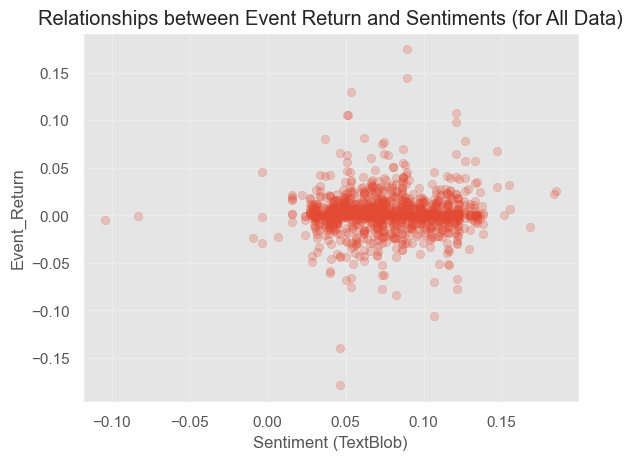

In [40]:
plt.scatter(Data_DF["sent_textblob"],
            Data_DF["Event_Return"],
            alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for All Data)")

plt.xlabel("Sentiment (TextBlob)")
plt.ylabel("Event_Return")

plt.show()

In [41]:
corr = Data_DF["Event_Return"].corr(Data_DF["sent_textblob"]
                                    )
corr

0.03388043298431977

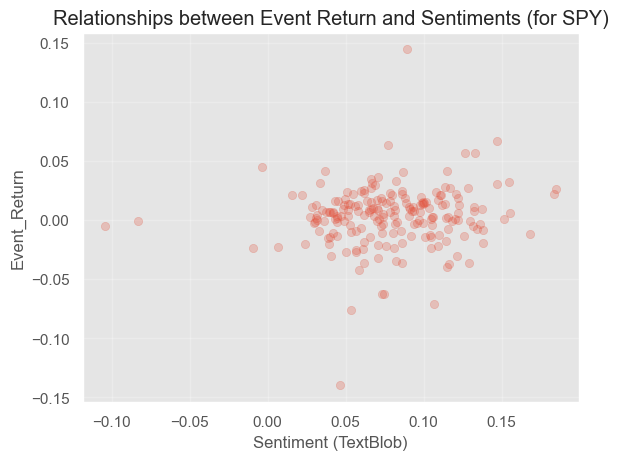

In [42]:
Data_DF_SPY = Data_DF[Data_DF["ticker"] == "SPY"]

plt.scatter(Data_DF_SPY["sent_textblob"], Data_DF_SPY["Event_Return"], alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for SPY)")

plt.xlabel("Sentiment (TextBlob)")
plt.ylabel("Event_Return")

plt.show()

### VADER

In [43]:
corr = Data_DF["Event_Return"].corr(Data_DF["sent_lex"]
                                    )
corr

0.012783713011401583

Text(0.5, 0, 'Sentiments (VADER)')

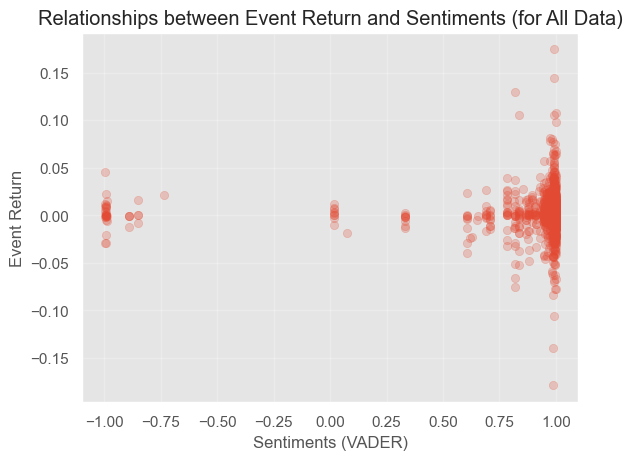

In [44]:
plt.scatter(Data_DF["sent_lex"], Data_DF["Event_Return"],
            alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for All Data)")

plt.ylabel("Event Return")
plt.xlabel("Sentiments (VADER)")

Text(0.5, 0, 'Sentiments (VADER)')

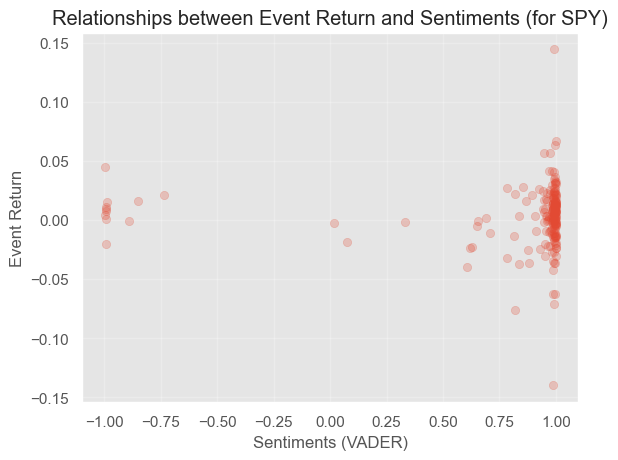

In [45]:
Data_DF_SPY = Data_DF[Data_DF["ticker"] == "SPY"]
plt.scatter(Data_DF_SPY["sent_lex"], Data_DF_SPY["Event_Return"],
            alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for SPY)")

plt.ylabel("Event Return")
plt.xlabel("Sentiments (VADER)")

### Loughran-McDonald Sentiment (LMS)

In [46]:
corr = Data_DF["Event_Return"].corr(Data_DF["sent_lm"]
                                    )
corr

-0.029098783682690463

Text(0.5, 0, 'Sentiments (LMS)')

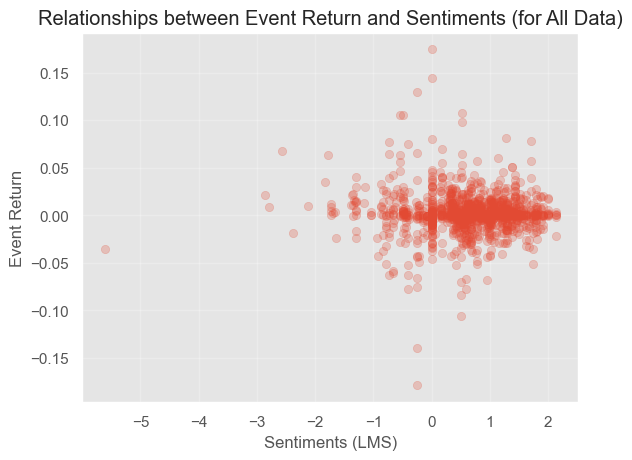

In [47]:
plt.scatter(Data_DF["sent_lm"], Data_DF["Event_Return"],
            alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for All Data)")

plt.ylabel("Event Return")
plt.xlabel("Sentiments (LMS)")

Text(0.5, 0, 'Sentiments (LMS)')

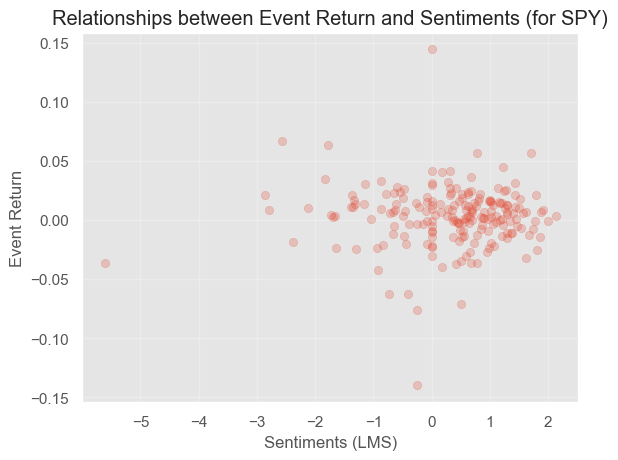

In [48]:
Data_DF_SPY = Data_DF[Data_DF["ticker"] == "SPY"]
plt.scatter(Data_DF_SPY["sent_lm"], Data_DF_SPY["Event_Return"],
            alpha = 0.25)

plt.title("Relationships between Event Return and Sentiments (for SPY)")

plt.ylabel("Event Return")
plt.xlabel("Sentiments (LMS)")

### Correlation

In [49]:
New_Data_DF = Data_DF[Data_DF["ticker"] == "SPY"][["ticker", "text", "sent_textblob", "sent_lex", "sent_lm"]]

from pandas import option_context

with option_context("display.max_colwidth", 400):
    display(New_Data_DF)

,ticker,text,sent_textblob,sent_lex,sent_lm
0,SPY,Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. The action is expected to be associated with a small increase in short-term money market interest rates. The decision was taken to move toward a less accommodative stance in monetary policy in order to sustain and enhance the economic expansi...,0.007,0.629,0.000
1,SPY,Chairman Alan Greenspan announced today that the Federal Open Market Committee decided to increase slightly the degree of pressure on reserve positions. This action is expected to be associated with a small increase in short-term money market interest rates.,-0.083,0.657,0.000
2,SPY,Chairman Alan Greenspan announced today that the Federal Reserve will increase slightly the degree of pressure on reserve positions. This action is expected to be associated with a small increase in short-term money market interest rates.,-0.104,0.649,0.000
3,SPY,"The Federal Reserve today announced two actions designed to maintain favorable trends in inflation and thereby sustain the economic expansion. The Board approved an increase in the discount rate from 3 percent to 3-1/2 percent, effective immediately, and the Federal Open Market Committee agreed that this increase should be allowed to show through completely into interest rates in reserve mark...",0.184,0.973,0.625
4,SPY,"The Federal Reserve Board today approved an increase in the discount rate from 4 percent to 4 3/4 percent, effective immediately. In a related move, the Federal Open Market Committee decided that the increase in the discount rate should be reflected fully in interest rates in reserve markets. These measures were taken against the background of evidence of persistent strength in economic acti...",0.155,0.987,-0.719
...,...,...,...,...,...
1250,SPY,"The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Federal Open Market Committee Monetary Policy Principles and Practice Policy Implementation Reports Review of Monetary Policy Strategy, Tools, and Communications Institution Supervision Reports Report...",0.130,0.959,0.369
1259,SPY,"The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Federal Open Market Committee Monetary Policy Principles and Practice Policy Implementation Reports Review of Monetary Policy Strategy, Tools, and Communications Institution Supervision Reports Report...",0.109,0.973,0.000
1268,SPY,"The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Federal Open Market Committee Monetary Policy Principles and Practice Policy Implementation Reports Review of Monetary Policy Strategy, Tools, and Communications Institution Supervision Reports Report...",0.117,0.784,0.420
1277,SPY,"The Federal Reserve, the central bank of the United States, provides the nation with a safe, flexible, and stable monetary and financial system. Federal Open Market Committee Monetary Policy Principles and Practice Policy Implementation Reports Review of Monetary Policy Strategy, Tools, and Communications Institution Supervision Reports Report...",0.116,0.837,0.419


<AxesSubplot: title={'center': 'Correlation Matrix'}>

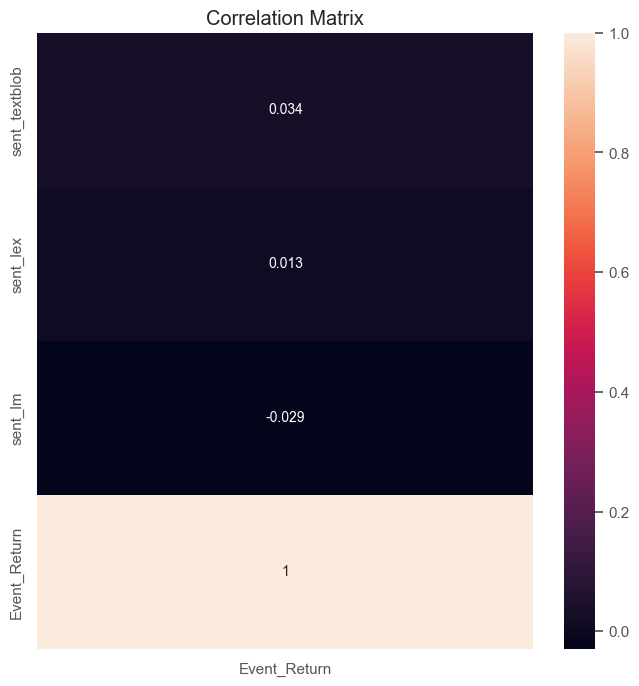

In [50]:
corr = Data_DF[["sent_textblob", "sent_lex", "sent_lm", "Event_Return"]].dropna(axis =0).corr()

plt.figure(figsize = (8, 8)
           )
plt.title("Correlation Matrix")
sns.heatmap(corr[["Event_Return"]],
            annot = True)

In [51]:
corr_data = []

for ticker in Data_DF["ticker"].unique():

    New_Data_DF = Data_DF[Data_DF["ticker"] == ticker]

    if New_Data_DF.shape[0] > 40 :
        corr_TextBlob = New_Data_DF["Event_Return"].corr(New_Data_DF["sent_textblob"])
        corr_VADER = New_Data_DF["Event_Return"].corr(New_Data_DF["sent_lex"])
        corr_LMS = New_Data_DF["Event_Return"].corr(New_Data_DF["sent_lm"])
        corr_data.append([ticker, corr_TextBlob, corr_VADER, corr_LMS])
    else:
        continue

In [52]:
corr_DF = pd.DataFrame(corr_data,
                       columns = ["ticker", "corr_TextBlob", "corr_VADER", "corr_LMS"]
                       )
corr_DF = corr_DF.set_index("ticker")
corr_DF

,corr_TextBlob,corr_VADER,corr_LMS
ticker,,,
SPY,0.111,-0.020,-0.002
TLT,0.004,0.109,-0.156
SHY,-0.026,0.161,-0.058
TIP,-0.013,0.022,-0.120
VNQ,-0.007,0.030,0.022
GLD,-0.033,-0.042,-0.129
DBC,0.144,-0.006,0.142
BND,0.015,0.070,-0.056
BIL,-0.233,-0.163,-0.182


<AxesSubplot: xlabel='ticker'>

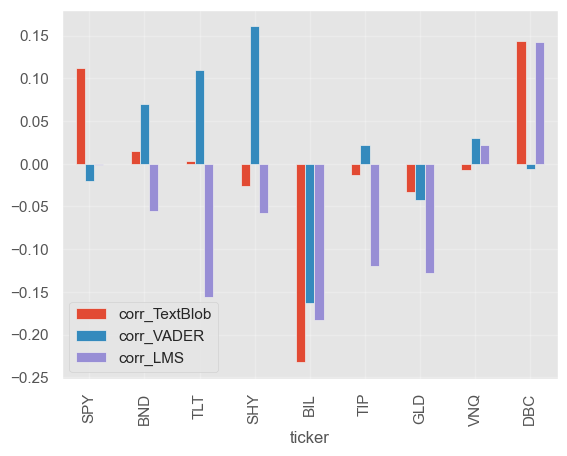

In [53]:
corr_DF.loc[tickers].plot.bar()

## Backtesting Strategy

In [54]:
import backtrader as bt
import backtrader.indicators as btind
import backtrader.analyzers as btanalyzers

Trade size: 100 units
Change in sentiment: +/- 0.5

In [55]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.5

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.5
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=100)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('100_05.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

In [56]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

In [57]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

Trade size: 110 units
Change in sentiment: +/- 0.5


In [58]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.5

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.5
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=110)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('110_05.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

In [59]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

In [60]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

Trade size: 90 units
Change in sentiment: +/- 0.5

In [61]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.5

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.5
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.5:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=90)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('90_05.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
    start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

In [62]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

In [63]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

Trade size: 100 units
Change in sentiment: +/- 0.55

In [64]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.55

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.55
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=100)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('100_055.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
    start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

In [65]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

In [66]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

Trade size: 100 units
Change in sentiment: +/- 0.45

In [67]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.45

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.45
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=100)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('100_045.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
    start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

In [68]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

In [69]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

90/0.55

In [70]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.55

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.55
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=90)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('90_055.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 3554.06, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 3554.06, Comm 0.00
1997-03-26, Profit of the operation, GROSS 968.79, NET 968.79
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 6047.02, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 6047.02, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2224.72, NET 2224.72
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 8079.14, Comm 0.00
2002-01-30, Previous Sentiment 0.73, New Sentiment -0.65 SELL CREATE, 75.37
2002-01-31, SELL DONE, Price: 75.56, Cost: 8079.14, Comm 0.00
2

<IPython.core.display.Javascript object>

Starting Value of Our Portfolio: 100000.00
Final Value of Our Portfolio: 118384.59
Profit: 18384.59



(27.54041290283203, 18384.592020068056)

In [71]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 3554.06, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 3554.06, Comm 0.00
1997-03-26, Profit of the operation, GROSS 968.79, NET 968.79
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 6047.02, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 6047.02, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2224.72, NET 2224.72
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 8079.14, Comm 0.00
2002-01-30, Previous Sentiment 0.73, New Sentiment -0.65 SELL CREATE, 75.37
2002-01-31, SELL DONE, Price: 75.56, Cost: 8079.14, Comm 0.00
2

In [72]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

,SPY,BND,TLT,SHY,BIL,TIP,GLD,VNQ,DBC
Per Unit Start Price,27.540,46.727,41.336,58.117,82.904,55.840,44.380,22.743,22.048
Strategy Profit,18384.583,-117.053,1512.850,1568.257,312.436,5735.561,11918.700,3069.534,249.886


90/0.45

In [73]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.55

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.55
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=90)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('90_045.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 3554.06, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 3554.06, Comm 0.00
1997-03-26, Profit of the operation, GROSS 968.79, NET 968.79
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 6047.02, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 6047.02, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2224.72, NET 2224.72
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 8079.14, Comm 0.00
2001-06-27, Previous Sentiment -1.15, New Sentiment -1.67 SELL CREATE, 81.26
2001-06-28, SELL DONE, Price: 81.61, Cost: 8079.14, Comm 0.00


(27.540422439575195, 12310.56433173173)

In [74]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 3554.06, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 3554.06, Comm 0.00
1997-03-26, Profit of the operation, GROSS 968.79, NET 968.79
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 6047.02, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 6047.02, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2224.72, NET 2224.72
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 8079.14, Comm 0.00
2001-06-27, Previous Sentiment -1.15, New Sentiment -1.67 SELL CREATE, 81.26
2001-06-28, SELL DONE, Price: 81.61, Cost: 8079.14, Comm 0.00


In [75]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

,SPY,BND,TLT,SHY,BIL,TIP,GLD,VNQ,DBC
Per Unit Start Price,27.540,46.727,41.336,58.117,82.904,55.840,44.380,22.743,22.048
Strategy Profit,12310.573,101.098,1867.922,1597.590,490.530,4879.452,12494.699,865.641,-656.901


110/0.55

In [76]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.55

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.55
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.55:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=110)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('110_055.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 4343.85, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 4343.85, Comm 0.00
1997-03-26, Profit of the operation, GROSS 1184.08, NET 1184.08
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 7390.80, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 7390.80, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2719.10, NET 2719.10
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 9874.50, Comm 0.00
2002-01-30, Previous Sentiment 0.73, New Sentiment -0.65 SELL CREATE, 75.37
2002-01-31, SELL DONE, Price: 75.56, Cost: 9874.50, Comm 0.00

(27.540401458740234, 22470.047640353238)

In [77]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 4343.85, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 4343.85, Comm 0.00
1997-03-26, Profit of the operation, GROSS 1184.08, NET 1184.08
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 7390.80, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 7390.80, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2719.11, NET 2719.11
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 9874.50, Comm 0.00
2002-01-30, Previous Sentiment 0.73, New Sentiment -0.65 SELL CREATE, 75.37
2002-01-31, SELL DONE, Price: 75.56, Cost: 9874.50, Comm 0.00

In [78]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

,SPY,BND,TLT,SHY,BIL,TIP,GLD,VNQ,DBC
Per Unit Start Price,27.540,46.727,41.336,58.117,82.904,55.840,44.380,22.743,22.048
Strategy Profit,22470.043,-143.069,1849.042,1916.751,381.865,7010.125,14567.300,3751.654,305.417


110/0.45

In [79]:
class Sentiment(bt.Indicator):
    lines = ("sentiment",)
    plotinfo = dict(
        plotymargin=0.5,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])

    def next(self):
        self.sentiment = 0.0
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]
                           ).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class SentimentStrat(bt.Strategy):
    params = (
        ("period", 15),
        ("printlog", True),
    )

    def log(self, txt, dt=None, doprint=False):
        """
        Logging function for this strategy
        """

        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print("%s, %s" % (dt.isoformat(), txt)
                  )

    def __init__(self):

        # Keep a reference to the "close" line in the data[0] dataseries

        self.dataclose = self.datas[0].close

        # Keep track of pending orders

        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(self.datas[0], period=self.params.period)
        self.date = self.data.datetime
        self.sentiment = None
        Sentiment(self.data)
        self.plotinfo.plot = False

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do

            return

        # Check if an order has been completed

        ###### ATTENTION: broker could reject order if not enough cash #######

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    "BUY DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log("SELL DONE, Price: %.2f, Cost: %.2f, Comm %.2f" %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log("Order Canceled/Margin/Rejected")

        # Write down: no pending order

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log("Profit of the operation, GROSS %.2f, NET %.2f" %
                 (trade.pnl, trade.pnlcomm))

    #### Main Strategy ####

    def next(self):
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]

        # Check if an order is pending. if yes, we cannot send a 2nd one

        if self.order:
            return

            # If not in the market and previous sentiment not none

        if not self.position and prev_sentiment:

            # buy if current close more than sma AND sentiment increased by >= 0.55

            if self.dataclose[0] > self.sma[0] and self.sentiment - prev_sentiment >= 0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f BUY CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.buy()

        # Already in the market and previous sentiment not none

        elif prev_sentiment:

            # sell if current close less than sma AND sentiment decreased by >= 0.55
            if self.dataclose[0] < self.sma[0] and self.sentiment - prev_sentiment <= -0.45:
                self.log("Previous Sentiment %.2f, New Sentiment %.2f SELL CREATE, %.2f" % (
                    prev_sentiment, self.sentiment, self.dataclose[0]
                )
                         )

                self.order = self.sell()

    def stop(self):
        self.log("(MA Period %2d) Ending Value %.2f" %
                 (self.params.period, self.broker.getvalue()), doprint=True)


def run_our_strategy(ticker, start, end):
    print(ticker)

    ticker = yf.Ticker(ticker)

    df_ticker = ticker.history(start=start,
                               end=end)

    BRAIN = bt.Cerebro()

    BRAIN.addstrategy(SentimentStrat)

    data = bt.feeds.PandasData(dataname=df_ticker)

    BRAIN.adddata(data)

    start = 100000.0

    BRAIN.broker.setcash(start)

    BRAIN.addsizer(bt.sizers.FixedSize, stake=110)

    print("Starting Value of Our Portfolio: %.2f" % start)

    plt.rcParams["font.size"] = "14"

    plt.rcParams["figure.figsize"] = [14, 10]

    BRAIN.run()

    BRAIN.plot(volume=False,
               iplot=True,
               plotname=ticker)

    figure = BRAIN.plot(style='candlebars')[0][0]
    figure.savefig('110_045.png')

    end = BRAIN.broker.getvalue()

    print("Starting Value of Our Portfolio: %.2f\nFinal Value of Our Portfolio: %.2f\nProfit: %.2f\n" % (
        start, end, end - start)
          )

    return float(df_ticker["Close"][0]), (end - start)


ticker = "SPY"

date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                )
]

date_sentiment = date_sentiment[["date", "sent_lm"]]

date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                        format="%Y-%m-%d").dt.date

date_sentiment = date_sentiment.set_index("date")["sent_lm"]

date_sentiment = date_sentiment.to_dict()

run_our_strategy(ticker,
                 start="1994-01-01",
                 end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 4343.85, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 4343.85, Comm 0.00
1997-03-26, Profit of the operation, GROSS 1184.07, NET 1184.07
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 7390.81, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 7390.81, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2719.10, NET 2719.10
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 9874.50, Comm 0.00
2001-06-27, Previous Sentiment -1.15, New Sentiment -1.67 SELL CREATE, 81.26
2001-06-28, SELL DONE, Price: 81.61, Cost: 9874.50, Comm 0.0

(27.5404052734375, 15046.2369940567)

In [80]:
results_tickers = {}

for ticker in tickers:
    date_sentiment = Data_DF[Data_DF["ticker"].isin([ticker]
                                                    )
    ]

    date_sentiment = date_sentiment[["date", "sent_lm"]]

    date_sentiment["date"] = pd.to_datetime(date_sentiment["date"],
                                            format="%Y-%m-%d").dt.date

    date_sentiment = date_sentiment.set_index("date")["sent_lm"]

    date_sentiment = date_sentiment.to_dict()

    results_tickers[ticker] = run_our_strategy(ticker,
                                               start="1994-01-01",
                                               end="2022-11-30")

SPY
Starting Value of Our Portfolio: 100000.00
1996-01-31, Previous Sentiment -2.38, New Sentiment -0.65 BUY CREATE, 39.53
1996-02-01, BUY DONE, Price: 39.49, Cost: 4343.85, Comm 0.00
1997-03-25, Previous Sentiment -0.65, New Sentiment -2.79 SELL CREATE, 50.06
1997-03-26, SELL DONE, Price: 50.25, Cost: 4343.85, Comm 0.00
1997-03-26, Profit of the operation, GROSS 1184.08, NET 1184.08
1998-09-29, Previous Sentiment -2.79, New Sentiment -1.64 BUY CREATE, 68.12
1998-09-30, BUY DONE, Price: 67.19, Cost: 7390.80, Comm 0.00
2000-11-15, Previous Sentiment 0.97, New Sentiment -0.61 SELL CREATE, 92.56
2000-11-16, SELL DONE, Price: 91.91, Cost: 7390.80, Comm 0.00
2000-11-16, Profit of the operation, GROSS 2719.10, NET 2719.10
2001-01-03, Previous Sentiment -5.61, New Sentiment -0.07 BUY CREATE, 89.81
2001-01-04, BUY DONE, Price: 89.77, Cost: 9874.50, Comm 0.00
2001-06-27, Previous Sentiment -1.15, New Sentiment -1.67 SELL CREATE, 81.26
2001-06-28, SELL DONE, Price: 81.61, Cost: 9874.50, Comm 0.0

In [81]:
pd.DataFrame.from_dict(results_tickers).set_index([pd.Index(["Per Unit Start Price",
                                                             "Strategy Profit"]
                                                            )
                                                   ]
                                                  )

,SPY,BND,TLT,SHY,BIL,TIP,GLD,VNQ,DBC
Per Unit Start Price,27.540,46.727,41.336,58.117,82.904,55.840,44.380,22.743,22.048
Strategy Profit,15046.250,123.564,2283.015,1952.620,599.544,5963.770,15271.299,1058.016,-802.880
